![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

#### Does increased electric vehicle sales lead to more public or private charging ports?

#### 1. How many vehicles were sold in 2018 in total? Save the answer as a numeric variable called ev_sales_2018.

#### 2. Plot trends for private ports, public ports, and sales, saving this as fig, ax objects.

#### 3. Did vehicle sales and number of private and public ports show the same trend (either increasing or decreasing) between the years 2015 and 2018? Save your answer as same or different to a variable called trend.

In [140]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [141]:
private_ev_charging = pd.read_csv('private_ev_charging.csv')
public_ev_charging = pd.read_csv('public_ev_charging.csv')
ev_sales = pd.read_csv('ev_sales.csv')

#### Question 1

In [142]:
ev_sales['tot_sales'] = ev_sales.groupby('year')['sales'].transform(sum)

tot_sales_year = ev_sales[['year', 'tot_sales']].drop_duplicates()

ev_sales_2018 = 361315

print(tot_sales_year)

ev_sales_2018 = 361315

   year  tot_sales
0  2011    17763.0
1  2012    53171.0
2  2013    97102.0
3  2014   118882.0
4  2015   114023.0
5  2016   159616.0
6  2017   195581.0
7  2018   361315.0
8  2019   326644.0


/var/folders/ph/td7f8msd4md23pppxr8dfz_c0000gn/T/ipykernel_47920/2495420695.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ev_sales['tot_sales'] = ev_sales.groupby('year')['sales'].transform(sum)


In [143]:
merged = private_ev_charging.merge(public_ev_charging, on = 'year')

merged = merged.merge(tot_sales_year, on = 'year')

print(merged)

   year  private_ports  private_station_locations  public_ports  \
0  2014           3695                       1825         22470   
1  2015           4150                       1962         26532   
2  2016           5763                       2331         33165   
3  2017           6048                       2370         45789   
4  2018           6812                       2489         56842   
5  2019           9955                       3078         73838   

   public_station_locations  tot_sales  
0                      9207   118882.0  
1                     10710   114023.0  
2                     13150   159616.0  
3                     16170   195581.0  
4                     19893   361315.0  
5                     23282   326644.0  


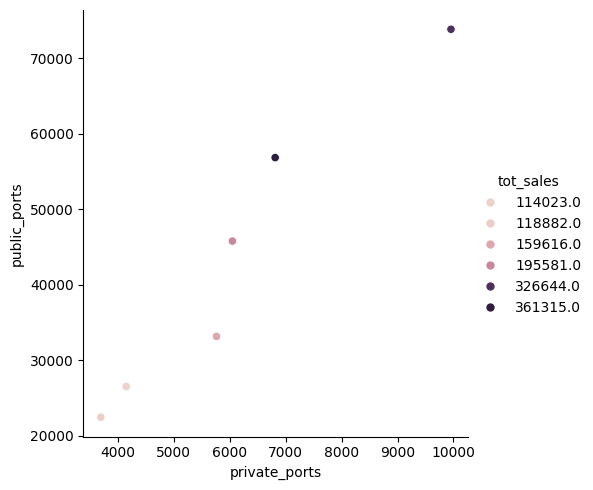

In [144]:
fig = sns.relplot(data = merged, x='private_ports', y = 'public_ports', hue = 'tot_sales')

/var/folders/ph/td7f8msd4md23pppxr8dfz_c0000gn/T/ipykernel_47920/907108172.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


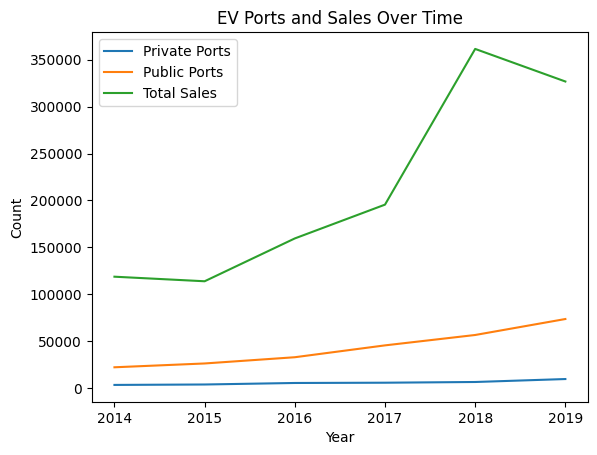

In [145]:
fig, ax = plt.subplots()
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')
ax.legend(loc='upper left')
sns.lineplot(data=merged, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=merged, x='year', y='public_ports', label='Public Ports')
sns.lineplot(data=merged, x='year', y='tot_sales', label='Total Sales')

plt.show()

trend = 'same'